## Working with Time Series Data

In [1]:
import numpy as np
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sf_temps = data.sf_temps()
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
sf_temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Part 1
__Use the above dataset for the exercises below:__

__1) Resample by the day and take the average temperature. Visualize the average temperature over time.__

In [4]:
#First set the index to be the date
sf_temps= sf_temps.set_index('date').sort_index()
sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [5]:
#Now resample
daily_temps = sf_temps.resample('D').mean()

<AxesSubplot:xlabel='date'>

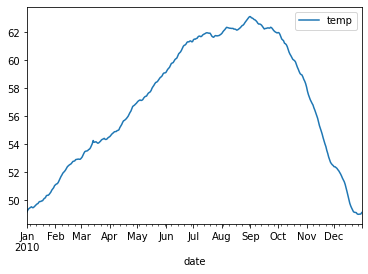

In [6]:
daily_temps.plot()

__2) Write the code necessary to visualize the minimum temperature over time.__

<AxesSubplot:xlabel='date'>

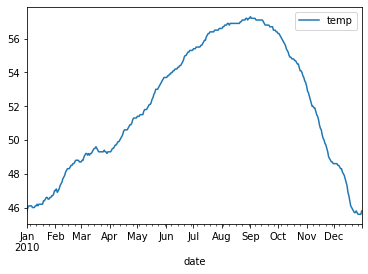

In [7]:
sf_temps.resample('D').min().plot()

__3) Write the code necessary to visualize the maximum temperature over time.__

<AxesSubplot:xlabel='date'>

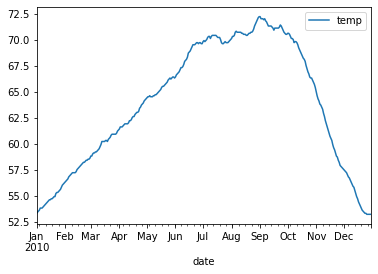

In [8]:
sf_temps.resample('D').max().plot()

__4) Which month is the coldest, on average?__

In [9]:
monthly_temps = sf_temps.resample('M').mean()

In [10]:
monthly_temps.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

__5) Which month has the highest average temperature?__

In [11]:
monthly_temps.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

__6) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?__

In [13]:
min_max_temps = sf_temps.resample('D').agg(['min', 'max'])

In [17]:
min_max_temps.set_axis(['min', 'max'], axis = 1, inplace = True)

In [18]:
min_max_temps['delta'] = min_max_temps['max'] - min_max_temps['min']
min_max_temps

,min,max,delta
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [21]:
#Find the month with the highest average delta
min_max_temps.resample('M').mean().delta.idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

__BONUS: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.__

In [92]:
min_max_avg_temps = sf_temps.resample('D').agg(['min', 'max', 'mean']).set_axis(['min', 'max', 'avg'], axis = 1)

<AxesSubplot:xlabel='date'>

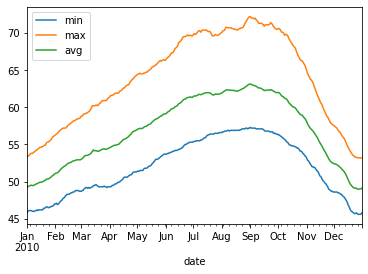

In [93]:
min_max_avg_temps.plot()

### Part 2

__Use the following dataset to answer the questions below__

In [22]:
weather = data.seattle_weather()

In [23]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


__1) Which year and month combination has the highest amount of precipitation?__

In [26]:
weather = weather.set_index('date').sort_index()

In [31]:
weather.resample("M").sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

__2) Visualize the amount of monthly precipitation over time.__

<AxesSubplot:xlabel='date'>

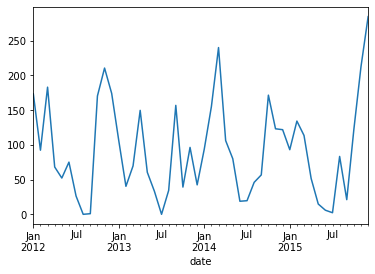

In [33]:
weather.resample("M").sum().precipitation.plot()

__3) Visualize the amount of wind over time. Choose a time interval you think is appropriate.__

<AxesSubplot:xlabel='date'>

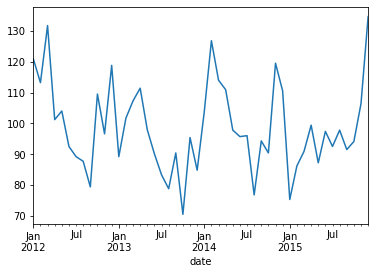

In [41]:
weather.resample("M").sum().wind.plot()

__4) Which year-month combination is the windiest?__

In [42]:
weather.resample("M").sum().wind.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

__5) What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)__

In [46]:
#Reset the weather df to create a 'year' column
weather = data.seattle_weather()
weather['year'] = weather.date.dt.year

In [47]:
#Create a df for sunny weather 
sunny = weather[weather.weather == 'sun']

In [49]:
sunny.year.value_counts().idxmax()

2014

__6) In which month does it rain the most?__

In [63]:
weather['month'] = weather.date.dt.month

In [64]:
#Create df for rainy days only
rainy = weather[weather.weather == 'rain']

In [66]:
rainy.month.value_counts().idxmax()

2

__7) Which month has the most number of days with a non-zero amount of precipitation?__

In [68]:
weather[weather.precipitation > 0].month.value_counts().idxmax()

12

### Part 3
__Use the following data set to answer the questions below__

In [69]:
flights = data.flights_20k()

In [70]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


__1) Convert any negative delays to 0.__

In [75]:
flights.delay = flights.delay.apply(lambda x: 0 if x < 0 else x)

__2) Which hour of the day has the highest average delay?__

In [77]:
flights['hour'] = flights.date.dt.hour

In [80]:
#Group by hour and find max average delay
flights.groupby('hour').delay.mean().idxmax()

3

__3) Does the day of the week make a difference in the delay amount?__

In [84]:
flights['weekday'] = flights.date.dt.day_name()

In [91]:
#Group by weekday and find average delay times
flights.groupby('weekday').delay.mean()

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

__4) Does the month make a difference in the delay amount?__

In [86]:
flights['month'] = flights.date.dt.month

In [87]:
flights.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64